#### 📊 evaluate.ipynb

##### Libraries and environment

In [1]:
model_name = "torch_2048_6"

In [2]:
# CIFAR10-Torch-Classifier and config.py
from cifar10_classifier import CIFAR10Classifier
import config

import os
import torch

##### Model & Config loading

In [3]:
config_path = os.path.join("models", model_name,  f"{model_name}_config.json")
model_path = os.path.join("models", model_name,  f"{model_name}_best_model.pth")

assert os.path.exists(config_path), f"Config not found at {config_path}"
assert os.path.exists(model_path), f"Model not found at {model_path}"

model = CIFAR10Classifier.load_model(
    model_name="torch_2048_6",
    config_path=config_path,
    model_path=model_path
)

model.summary()

Layer (type:depth-idx)                   Output Shape              Param #
CIFAR10_torch                            [1, 10]                   --
├─Flatten: 1-1                           [1, 3072]                 --
├─Sequential: 1-2                        [1, 64]                   --
│    └─Linear: 2-1                       [1, 2048]                 6,293,504
│    └─BatchNorm1d: 2-2                  [1, 2048]                 4,096
│    └─ReLU: 2-3                         [1, 2048]                 --
│    └─Dropout: 2-4                      [1, 2048]                 --
│    └─Linear: 2-5                       [1, 1024]                 2,098,176
│    └─BatchNorm1d: 2-6                  [1, 1024]                 2,048
│    └─ReLU: 2-7                         [1, 1024]                 --
│    └─Dropout: 2-8                      [1, 1024]                 --
│    └─Linear: 2-9                       [1, 512]                  524,800
│    └─BatchNorm1d: 2-10                 [1, 512]           

📊 Training plot saved to models\torch_2048_6\torch_2048_6_metrics.png


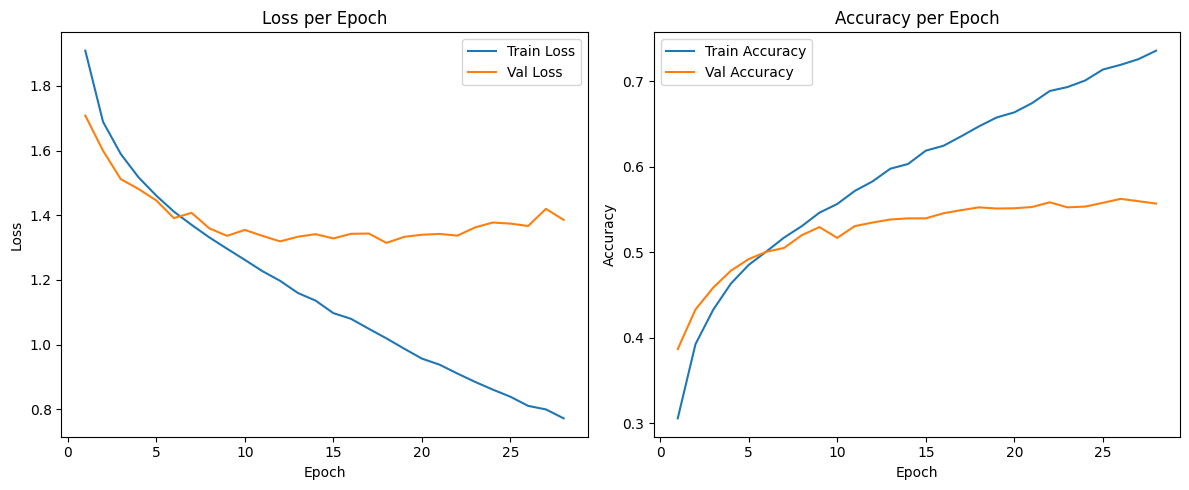

In [4]:
metrics_path = os.path.join("models", model_name, f"{model_name}_metrics.json")
model.plot_training_history(metrics_path)

##### Model evaluation

##### Test data loading

In [5]:
# data loading
from utils import (
    get_transforms,
    load_cifar10_datasets, create_loaders
)

mean, std = torch.tensor(model.mean), torch.tensor(model.std)
# Apply transformations
full_transform = get_transforms(mean, std)

# Load with transformations
_, test_dataset = load_cifar10_datasets(transform=full_transform, subset="test")
# extract class names
class_names = test_dataset.classes

# Loaders
_, _, test_loader = create_loaders(_, _, test_dataset, batch_size=config.BATCH_SIZE)

🧪 Creating normalization transform...
📥 Downloading/loading CIFAR-10 datasets... Loading test dataset
Files already downloaded and verified
✅ Loaded test samples: 10000
📦 Creating data loaders with batch size 256...
✅ Data loaders ready.


##### Metrics

In [6]:
metrics = model.evaluate(test_loader,verbose=True)

Validation loss: 1.2938, accuracy: 0.5520


##### Visualizations

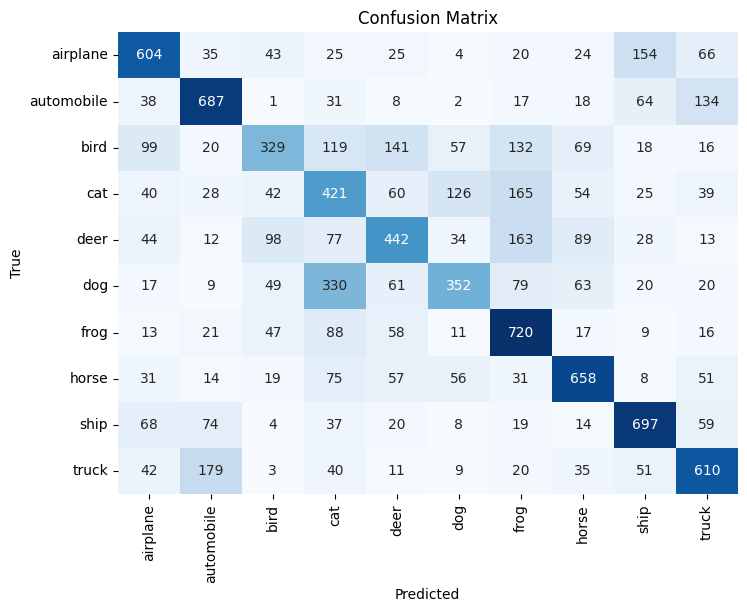

In [7]:
model.plot_confusion_matrix(metrics["y_pred"], metrics["y_true"], class_names=class_names)

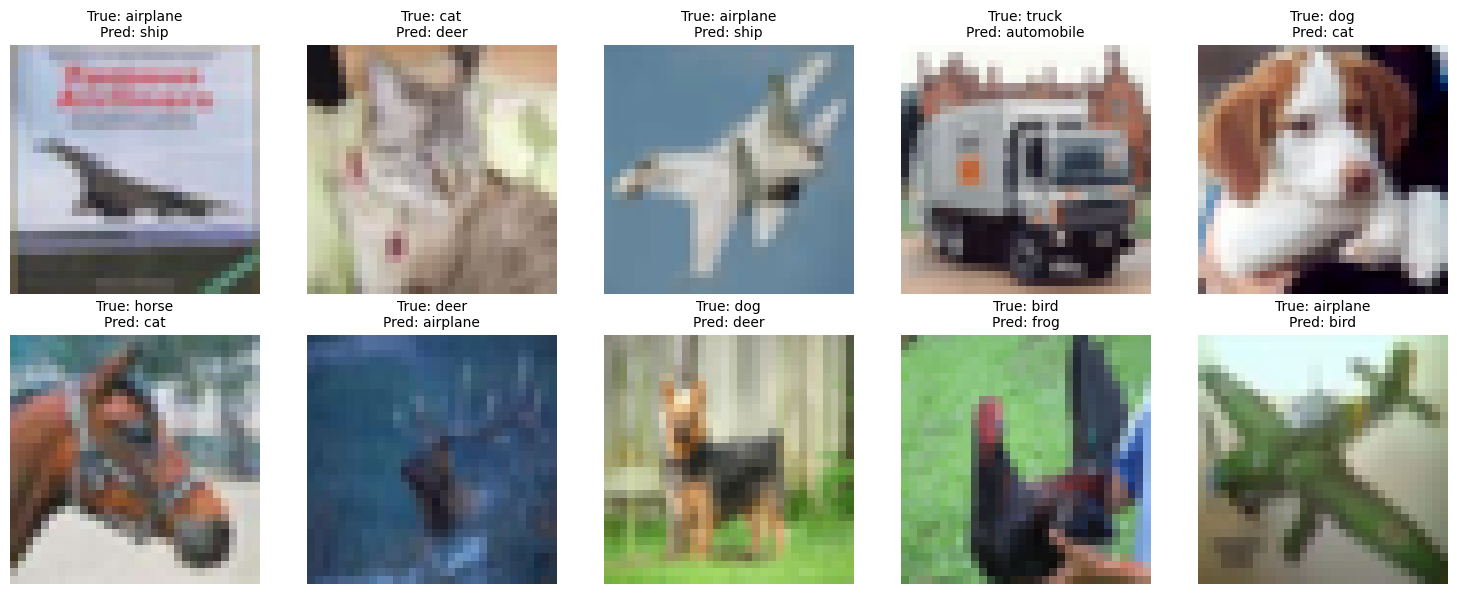

In [8]:
model.show_misclassified(data_loader=test_loader, class_names=class_names, max_images=10)

#### Predictions

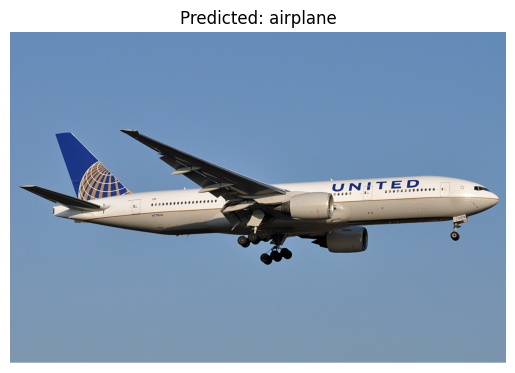

'airplane'

In [9]:
# make prediction for a single image
image_path = os.path.join("data","samples","airplane.jpg")

model.predict_image(path=image_path, transform=full_transform, class_names=class_names)


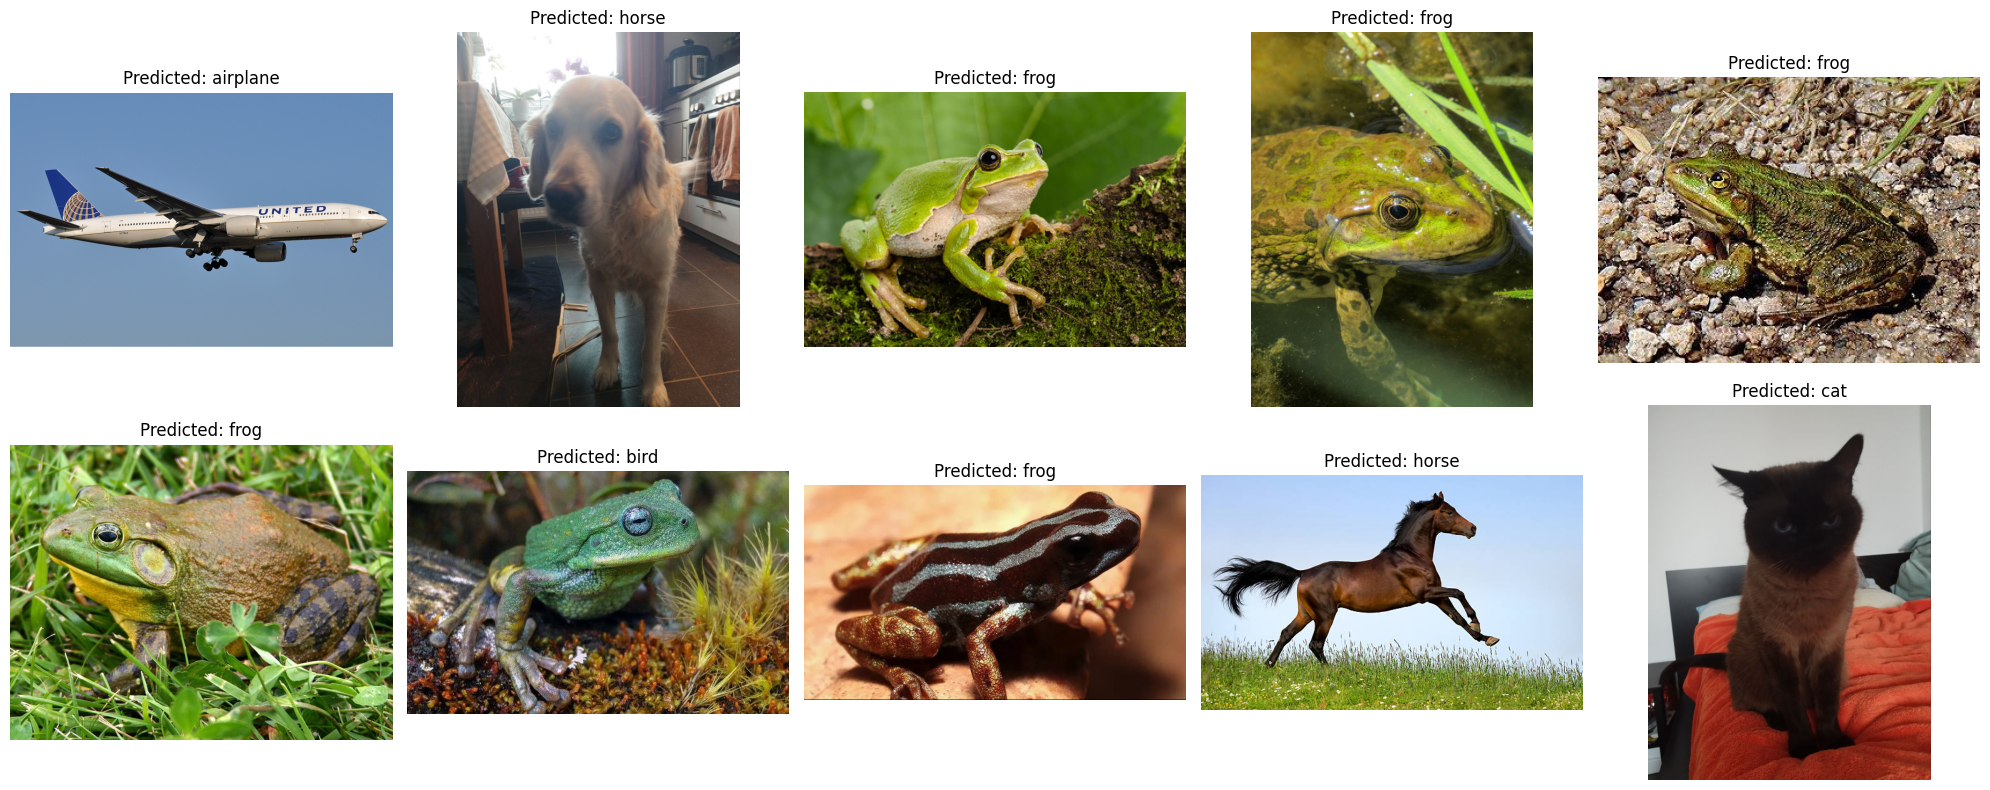

[('data\\samples\\airplane.jpg', 'airplane'),
 ('data\\samples\\Ayri.jpg', 'horse'),
 ('data\\samples\\frog.jpg', 'frog'),
 ('data\\samples\\frog2.jpg', 'frog'),
 ('data\\samples\\frog3.jpg', 'frog'),
 ('data\\samples\\frog4.jpg', 'frog'),
 ('data\\samples\\frog5.jpg', 'bird'),
 ('data\\samples\\frog6.jpg', 'frog'),
 ('data\\samples\\horse.jpg', 'horse'),
 ('data\\samples\\Tinka.jpg', 'cat')]

In [12]:
# make prediction for a single image
images_path = os.path.join("data","samples")

model.predict_images(directory=images_path, transform=full_transform, class_names=class_names)